###목표
- 환자 데이터를 바탕으로 해당 환자가 유방암인지 아닌지를 구분하는 신경망 모델을 만들어보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn에서 지원해주는 학습용 유방암 데이터셋 임포트
from sklearn.datasets import load_breast_cancer

In [2]:
# 모든 컬럼 표시
pd.set_option('display.max_columns', None)

In [3]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# 문제와 정답 데이터 분리
X = data['data']
y = data['target']

In [6]:
X.shape, y.shape

((569, 30), (569,))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

### 인공신경망 모델링
1. 신경망 구조 설계
2. 학습 및 평가 방법 설정
3. 학습 및 시각화
4. 모델 평가

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)
# 입력층(input_dim) + 중간층 1개(Dense)
model.add(Dense(30, input_dim=30, activation='sigmoid'))

# 중간층
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))

# 출력층 : 문제의 종류에 따라서 고정됨
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 30)                930       
                                                                 
 dense_23 (Dense)            (None, 16)                496       
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 4)                 36        
                                                                 
 dense_26 (Dense)            (None, 2)                 10        
                                                                 
 dense_27 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1,611
Trainable params: 1,611
Non-traina

In [25]:
# 2.학습 및 평가방법 설정
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['acc']
)

In [26]:
h = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.6635 - acc: 0.6338
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6620 - acc: 0.6338
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6605 - acc: 0.6338
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6595 - acc: 0.6338
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6586 - acc: 0.6338
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6580 - acc: 0.6338
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6573 - acc: 0.6338
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6564 - acc: 0.6338
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6559 - acc: 0.6338
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6551 - acc: 0.6338
Epoch 11/100
14/14 [==============================] - 0s 3m

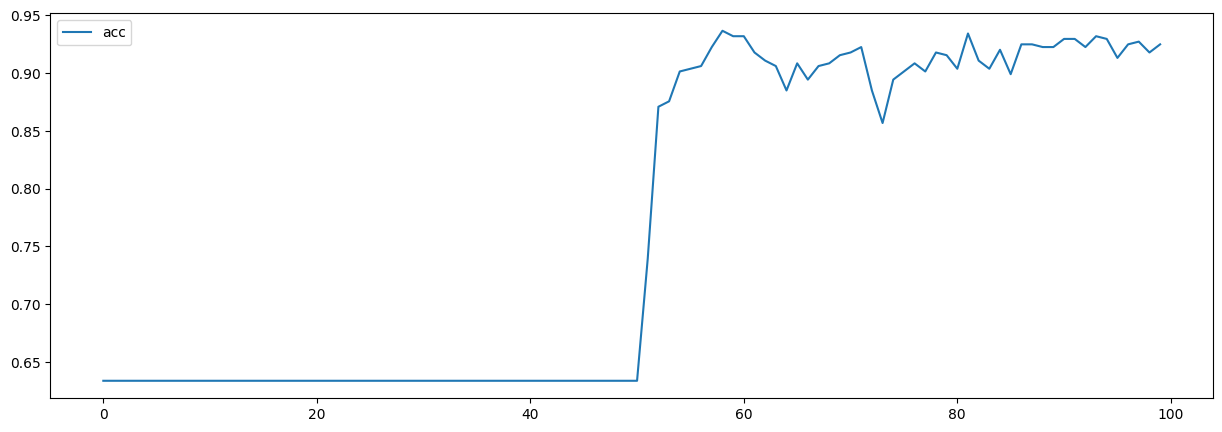

In [27]:
# 3. 시각화
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')

plt.legend()
plt.show()

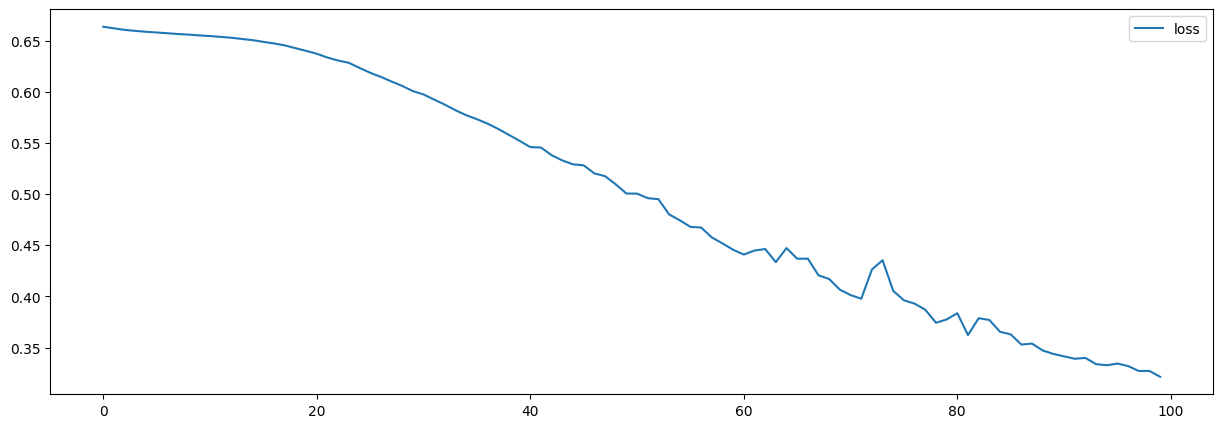

In [29]:
# 3. 시각화
plt.figure(figsize=(15,5))

plt.plot(h.history['loss'], label='loss')

plt.legend()
plt.show()

In [28]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.2978 - acc: 0.9441


[0.2977939546108246, 0.9440559148788452]